Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['histogram', 'square']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


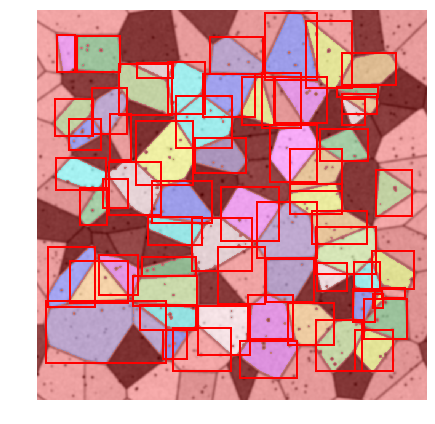

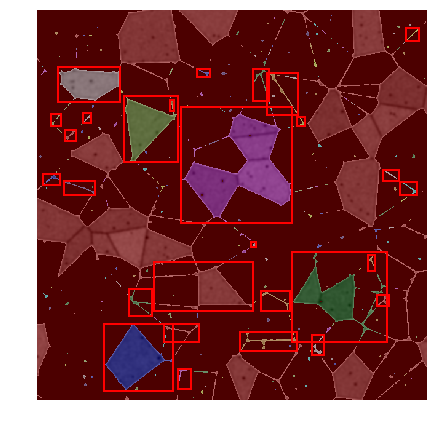

[33.12015758629574, 861.5384615384615, 3446.1538461538457]


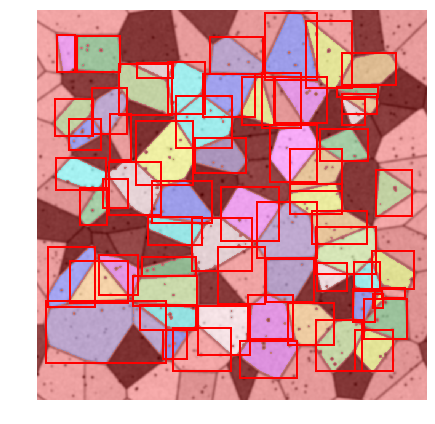

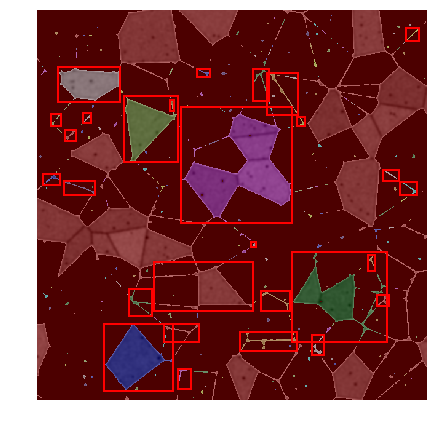

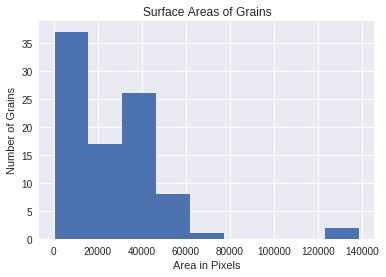

In [142]:
%pylab inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import os


import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_triangle
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb


def labelsInv(path):
  imagePath = path
  image = cv.imread(imagePath, 0)
  ret, image = cv.threshold(image, 0, 255, cv.THRESH_TOZERO_INV + cv.THRESH_OTSU )

  #Track labels
  numLabel = 0
  labelRegion = []
  
  # apply threshold
  thresh = threshold_mean(image)
  bw = closing(image > thresh, square(3))

  # remove artifacts connected to image border
  cleared = clear_border(bw)

  # label image regions
  label_image = label(cleared)
  image_label_overlay = label2rgb(label_image, image=image)

  fig, ax = plt.subplots(figsize=(10, 6))
  ax.imshow(image_label_overlay)

  for region in regionprops(label_image):
      # take regions with large enough areas
      if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

        labelRegion.append(region.area)
        numLabel = numLabel + 1
        
  ax.set_axis_off()
  plt.tight_layout()
  plt.show()

  return [numLabel, labelRegion]
  
  print(numLabel)
  
def labels(path):
  imagePath = path
  image = cv.imread(imagePath, 0)

  #Track labels
  labelRegion = []
  numLabel = 0
  
  # apply threshold
  thresh = threshold_mean(image)
  bw = closing(image > thresh, square(3))

  # remove artifacts connected to image border
  cleared = clear_border(bw)

  # label image regions
  label_image = label(cleared)
  image_label_overlay = label2rgb(label_image, image=image)

  fig, ax = plt.subplots(figsize=(10, 6))
  ax.imshow(image_label_overlay)

  for region in regionprops(label_image):
      # take regions with large enough areas
      if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

        labelRegion.append(region.area)
        numLabel = numLabel + 1
        
  ax.set_axis_off()
  plt.tight_layout()
  plt.show()

  return [numLabel, labelRegion]
   
def avgSize(numGrain):
  avgSize = 78400/numGrain
  
  r = math.sqrt(avgSize/pi)
  surfaceArea = 4*pi*r*r
  
  return [r*2,avgSize, surfaceArea]

def histogram(label, labelInv):
  arr = label + labelInv
  arrArea = []
  
  for i in range(len(arr)):
      r = math.sqrt(arr[i]/pi)
      surfaceArea = 4*pi*r*r
      arrArea.append(surfaceArea)
      
  arrArea = np.array(arrArea)    
  plt.hist(arrArea, bins='auto')
  plt.title('Surface Areas of Grains')
  plt.xlabel('Area in Pixels')
  plt.ylabel('Number of Grains')
  plt.show()
  
  

def main():
  
    imgpath1 = r"bz.png"

    img = cv.imread(imgpath1, 0)
    
    th = 0
    max_val = 255
    
    #for challenge 3 pre preparing
    ret, o6 = cv.threshold(img, th, max_val, cv.THRESH_BINARY + cv.THRESH_OTSU )
    ret, o7 = cv.threshold(img, th, max_val, cv.THRESH_BINARY_INV + cv.THRESH_OTSU )
    
    output = [o6,o7,o8]

        
    
    for i in range(len(output)):
        plt.subplot(2, 4, i+1)
        plt.imshow(output[i], cmap='gray')
        plt.xticks([])
        plt.yticks([])
        plt.savefig('my'+str(i)+'.png', dpi=300, pad_inches=None, bbox_inches='tight')
    plt.show() 
    

    

    

if __name__ == "__main__":
    print(avgSize(int(labels('bb.png')[0]+labelsInv('bb.png')[0])))
    histogram(labels('bb.png')[1], labelsInv('bb.png')[1])
    
    

In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

tcmalloc: large alloc 1073750016 bytes == 0x57422000 @  0x7f5a55c862a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
